In [3]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from textblob import TextBlob
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\THE_DE_V_IL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\THE_DE_V_IL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\THE_DE_V_IL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
# reading csv
amazon= pd.read_csv('Laptops_amazon.csv')
amazon = amazon.drop(columns=amazon.columns[0])
amazon = amazon.drop_duplicates()

In [5]:
amazon.head()

,Name,Price,Actual Price,Discount,Rating,Count,review,reviewer,review_date,review_title
0,HP Victus Gaming Laptop AMD Ryzen 5 5600H 15.6...,"63,113","77,354",18,4,"1,385",The media could not be loaded.\n ...,Careful Buyer,21 May 2022,Overall Good Laptop for both medium-high graph...
1,HP Victus Gaming Laptop AMD Ryzen 5 5600H 15.6...,"63,113","77,354",18,4,"1,385",This laptop excels in display and to some exte...,Chonulewis,26 March 2023,"Not a bang for buck ,but pretty decent for gam..."
2,HP Victus Gaming Laptop AMD Ryzen 5 5600H 15.6...,"63,113","77,354",18,4,"1,385",Review post approx. 5 months of use:Despite th...,Dhruv Srivastava,22 January 2023,Budget king - period
3,HP Victus Gaming Laptop AMD Ryzen 5 5600H 15.6...,"63,113","77,354",18,4,"1,385",Pros:Good 16 inch anti-glare displayValue for ...,Naveen kumar,17 April 2023,Got it at valuable price of 52k but still havi...
4,HP Victus Gaming Laptop AMD Ryzen 5 5600H 15.6...,"63,113","77,354",18,4,"1,385",Most useful for gaming and coding,Aniket,24 April 2023,Smooth processor.


In [6]:
amazon.isnull().sum()

Name             0
Price            0
Actual Price     0
Discount         0
Rating           0
Count            0
review          30
reviewer         1
review_date      0
review_title     0
dtype: int64

In [7]:
# dropping nulls
amazon.dropna(inplace=True)

In [8]:
# since we are doing sentiment analysis, we are dropping the rows with no review
for index, row in amazon.iterrows():
    if 'No review' in row.values:
        amazon.drop(index=index, inplace=True)


In [9]:
# Validating columns
amazon['Price'] = pd.to_numeric(amazon['Price'].str.replace(',', ''))
amazon['Actual Price'] = pd.to_numeric(amazon['Actual Price'].str.replace(',', ''))
amazon['Review_count'] = pd.to_numeric(amazon['Count'].str.replace(',', ''))
amazon.drop(columns='Count',inplace=True)

In [10]:
amazon['review_date']=pd.to_datetime(amazon['review_date'], format=r'%d %B %Y')

In [11]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032 entries, 0 to 2052
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          1032 non-null   object        
 1   Price         1032 non-null   int64         
 2   Actual Price  1032 non-null   int64         
 3   Discount      1032 non-null   int64         
 4   Rating        1032 non-null   int64         
 5   review        1032 non-null   object        
 6   reviewer      1032 non-null   object        
 7   review_date   1032 non-null   datetime64[ns]
 8   review_title  1032 non-null   object        
 9   Review_count  1032 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 88.7+ KB


In [12]:
amazon.describe()

,Price,Actual Price,Discount,Rating,Review_count
count,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000
mean,105153.876938,135388.992248,23.461240,3.710271,153.512597
std,84335.027401,93355.682815,10.980383,0.591215,288.825767
min,19357.000000,38990.000000,0.000000,1.000000,1.000000
25%,63500.000000,84198.000000,16.000000,3.000000,12.000000
50%,79999.000000,101389.000000,22.000000,4.000000,36.500000
75%,115300.000000,149199.000000,30.000000,4.000000,121.000000
max,657036.000000,671990.000000,78.000000,5.000000,1778.000000


In [13]:
# there are worth more than 6.5 lakhs

In [14]:
# assigning random numbers for ID, to join later
amazon['ID'] = np.random.randint(low=10000, high=99999, size=len(amazon))
amazon = amazon.set_index('ID')

In [15]:
amazon.head()

,Name,Price,Actual Price,Discount,Rating,review,reviewer,review_date,review_title,Review_count
ID,,,,,,,,,,
16944,HP Victus Gaming Laptop AMD Ryzen 5 5600H 15.6...,63113,77354,18,4,The media could not be loaded.\n ...,Careful Buyer,2022-05-21,Overall Good Laptop for both medium-high graph...,1385
59461,HP Victus Gaming Laptop AMD Ryzen 5 5600H 15.6...,63113,77354,18,4,This laptop excels in display and to some exte...,Chonulewis,2023-03-26,"Not a bang for buck ,but pretty decent for gam...",1385
70245,HP Victus Gaming Laptop AMD Ryzen 5 5600H 15.6...,63113,77354,18,4,Review post approx. 5 months of use:Despite th...,Dhruv Srivastava,2023-01-22,Budget king - period,1385
18745,HP Victus Gaming Laptop AMD Ryzen 5 5600H 15.6...,63113,77354,18,4,Pros:Good 16 inch anti-glare displayValue for ...,Naveen kumar,2023-04-17,Got it at valuable price of 52k but still havi...,1385
89911,HP Victus Gaming Laptop AMD Ryzen 5 5600H 15.6...,63113,77354,18,4,Most useful for gaming and coding,Aniket,2023-04-24,Smooth processor.,1385


In [16]:
# Sentiment analysis

In [17]:
sent_review= amazon[['review', 'review_title']]
sent_review.head()

,review,review_title
ID,,
16944,The media could not be loaded.\n ...,Overall Good Laptop for both medium-high graph...
59461,This laptop excels in display and to some exte...,"Not a bang for buck ,but pretty decent for gam..."
70245,Review post approx. 5 months of use:Despite th...,Budget king - period
18745,Pros:Good 16 inch anti-glare displayValue for ...,Got it at valuable price of 52k but still havi...
89911,Most useful for gaming and coding,Smooth processor.


In [ ]:

sent_review['review_title'] = sent_review['review_title'].str.lower()
sent_review['review'] = sent_review['review'].str.lower()

In [ ]:
# remove punctuation
sent_review['review_title'] = sent_review['review_title'].str.replace('[^\w\s]',' ')
sent_review['review'] = sent_review['review'].str.replace('[^\w\s]',' ')

In [ ]:
# tokeniing the words
sent_review['review_title'] = sent_review['review_title'].apply(word_tokenize)
sent_review['review'] = sent_review['review'].apply(word_tokenize)

In [ ]:
# Removing stopwords
stop_words = set(stopwords.words('english'))
sent_review['review_title']= sent_review['review_title'].apply(lambda x:' '.join ([word for word in x  if word not in stop_words]))
sent_review['review']= sent_review['review'].apply(lambda x:' '.join ([word for word in x if word not in stop_words]))

In [ ]:
# lemmatize words
lemmatizer = WordNetLemmatizer()
sent_review['review_title'] = sent_review['review_title'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
sent_review['review'] = sent_review['review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [ ]:
# apply sentiment analysis using TextBlob
sent_review['review_title_polarity'] = sent_review['review_title'].apply(lambda x: TextBlob(x).sentiment.polarity)
sent_review['review_polarity'] = sent_review['review'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [ ]:
# classify sentiment based on polarity score
sent_review['review_title_sentiment'] = sent_review['review_title_polarity'].apply(lambda x: 'Positive' if x>0 else 'Negative' if x<0 else 'Neutral')
sent_review['review_sentiment'] = sent_review['review_polarity'].apply(lambda x: 'Positive' if x>0 else 'Negative' if x<0 else 'Neutral')


In [25]:
sent_review.sort_values(by='review_polarity',ascending=False).head()

,review,review_title,review_title_polarity,review_polarity,review_title_sentiment,review_sentiment
ID,,,,,,
96888,best quality best price range,best high gaming laptop,0.58,1.0,Positive,Positive
26563,medium could loaded best gaming laptop intel i...,best gaming laptop best coding editing work,1.00,1.0,Positive,Positive
73723,best gaming laptop price,best gaming laptop,1.00,1.0,Positive,Positive
53769,best laptop price range comparison company let...,best laptop,1.00,1.0,Positive,Positive
97991,best gaming laptop price,best gaming laptop,1.00,1.0,Positive,Positive


In [26]:
# vader Model

In [27]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [28]:
reviews = sent_review[['review','review_polarity' ,'review_sentiment']]

In [29]:
reviews = reviews.rename(columns={'review_sentiment': 'tb_sentiment','review_polarity': 'tb_score'})


In [30]:

def get_vader_sentiment(review):
    scores = sia.polarity_scores(review)
    return scores['compound']

# Apply the VADER model to each review and add the results to the dataframe
reviews['vader_sentiment_score'] = reviews['review'].apply(get_vader_sentiment)


In [31]:
reviews['vader_sentiment'] = reviews['vader_sentiment_score'].apply(lambda x: 'Positive' if x>0 else ('Negative' if x<0 else 'Neutral'))

In [32]:
reviews=reviews.sort_values(by='ID')

In [33]:
reviews.head()

,review,tb_score,tb_sentiment,vader_sentiment_score,vader_sentiment
ID,,,,,
10023,nice laptop,0.600000,Positive,0.4215,Positive
10028,laptop offering gtx 1650 great price screen qu...,0.700000,Positive,0.9073,Positive
10037,100 battery use upto 2 15 hour sound le perfor...,0.550000,Positive,0.4404,Positive
10273,bough dec 2021we bought game development perfo...,0.043750,Positive,0.9118,Positive
10307,hardware good display specifically great many ...,0.292308,Positive,0.8358,Positive


In [34]:
# lets see how many values have they give same outpuT
reviews['sentiment_agreement'] = np.where(reviews['tb_sentiment'] == reviews['vader_sentiment'], 'agree', 'disagree')


In [35]:
reviews.sentiment_agreement.value_counts()

agree       892
disagree    140
Name: sentiment_agreement, dtype: int64

In [36]:
reviews[reviews['sentiment_agreement'] == 'disagree']

,review,tb_score,tb_sentiment,vader_sentiment_score,vader_sentiment,sentiment_agreement
ID,,,,,,
10848,using laptop three month incredibly fast 144hz...,0.183333,Positive,-0.0516,Negative,disagree
12881,could improve sturdiness product fragile feel,0.000000,Neutral,0.4404,Positive,disagree
12882,defective piece received please please replace...,0.000000,Neutral,0.1779,Positive,disagree
13254,drawback trackpad use mouse getting moved auto...,0.050000,Positive,-0.2960,Negative,disagree
14057,value money term spec game run butter smooth b...,0.066667,Positive,-0.2263,Negative,disagree
...,...,...,...,...,...,...
97185,product problem mouse pad,0.000000,Neutral,-0.4019,Negative,disagree
97881,want listen song play video lappy disappoint s...,0.200000,Positive,-0.2732,Negative,disagree
98033,battery dryning le 50 min playing game le 90 m...,-0.400000,Negative,0.2023,Positive,disagree


In [37]:
# when we check the disagreement, we can see the models are not completely accurate

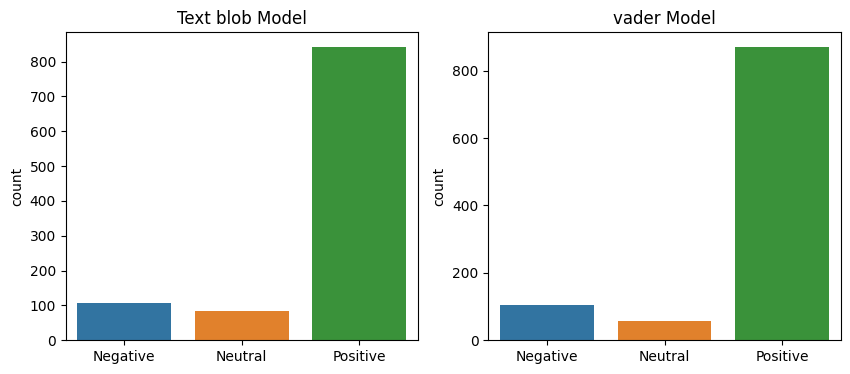

In [38]:
tb_sent= reviews.groupby('tb_sentiment').size().reset_index(name='count')
vader_sent= reviews.groupby('vader_sentiment').size().reset_index(name='count')
fig, (ax1,ax2) = plt.subplots(1,2, figsize=[10,4])
ax1.set_title('Text blob Model')

sns.barplot(x='tb_sentiment', y = 'count', data= tb_sent, ax=ax1)
ax2.set_title('vader Model')

sns.barplot(x='vader_sentiment', y = 'count', data= vader_sent, ax=ax2)
ax1.set_xlabel('')
ax2.set_xlabel('')
plt.show()

In [39]:
# However, the count is almost same!

In [40]:
# i'm just taking the text blob sentiment from 'sent review' and joining to the first data frame 'amazon'

In [41]:
Product_df= amazon.join(sent_review['review_sentiment'], how= 'inner', on= 'ID')


In [42]:
Product_df.head()

,Name,Price,Actual Price,Discount,Rating,review,reviewer,review_date,review_title,Review_count,review_sentiment
ID,,,,,,,,,,,
16944,HP Victus Gaming Laptop AMD Ryzen 5 5600H 15.6...,63113,77354,18,4,The media could not be loaded.\n ...,Careful Buyer,2022-05-21,Overall Good Laptop for both medium-high graph...,1385,Positive
16944,HP Victus Gaming Laptop AMD Ryzen 5 5600H 15.6...,63113,77354,18,4,The media could not be loaded.\n ...,Careful Buyer,2022-05-21,Overall Good Laptop for both medium-high graph...,1385,Positive
16944,"Lenovo Legion 5 Pro AMD Ryzen 7 6800H 16"" (40....",189100,260290,27,4,I have been using this laptop for two months n...,Sukalyan b.,2022-06-11,Amazing laptop.,65,Positive
16944,"Lenovo Legion 5 Pro AMD Ryzen 7 6800H 16"" (40....",189100,260290,27,4,I have been using this laptop for two months n...,Sukalyan b.,2022-06-11,Amazing laptop.,65,Positive
59461,HP Victus Gaming Laptop AMD Ryzen 5 5600H 15.6...,63113,77354,18,4,This laptop excels in display and to some exte...,Chonulewis,2023-03-26,"Not a bang for buck ,but pretty decent for gam...",1385,Positive


In [43]:
Product_df['brand'] = Product_df['Name'].str.split().str[0].str.upper()


In [44]:
Product_df = Product_df.drop_duplicates()

In [45]:
Product_df.head()

,Name,Price,Actual Price,Discount,Rating,review,reviewer,review_date,review_title,Review_count,review_sentiment,brand
ID,,,,,,,,,,,,
16944,HP Victus Gaming Laptop AMD Ryzen 5 5600H 15.6...,63113,77354,18,4,The media could not be loaded.\n ...,Careful Buyer,2022-05-21,Overall Good Laptop for both medium-high graph...,1385,Positive,HP
16944,"Lenovo Legion 5 Pro AMD Ryzen 7 6800H 16"" (40....",189100,260290,27,4,I have been using this laptop for two months n...,Sukalyan b.,2022-06-11,Amazing laptop.,65,Positive,LENOVO
59461,HP Victus Gaming Laptop AMD Ryzen 5 5600H 15.6...,63113,77354,18,4,This laptop excels in display and to some exte...,Chonulewis,2023-03-26,"Not a bang for buck ,but pretty decent for gam...",1385,Positive,HP
70245,HP Victus Gaming Laptop AMD Ryzen 5 5600H 15.6...,63113,77354,18,4,Review post approx. 5 months of use:Despite th...,Dhruv Srivastava,2023-01-22,Budget king - period,1385,Positive,HP
18745,HP Victus Gaming Laptop AMD Ryzen 5 5600H 15.6...,63113,77354,18,4,Pros:Good 16 inch anti-glare displayValue for ...,Naveen kumar,2023-04-17,Got it at valuable price of 52k but still havi...,1385,Positive,HP


In [46]:


NVIDIA = ['RTX', 'GTX', 'NVIDIA']

Product_df['Graphics'] = np.where(Product_df['Name'].str.contains('|'.join(NVIDIA), case=False), 'Nvidia', 'AMD')


In [47]:
Product_df.Graphics.value_counts()

Nvidia    901
AMD       131
Name: Graphics, dtype: int64

In [48]:
labels = ['cheap','average','expensive','elite']
Product_df['price_category'] = pd.cut(Product_df['Price'], 
                                      bins=[0, np.percentile(Product_df['Price'], 25),
                                            np.percentile(Product_df['Price'], 60),
                                            np.percentile(Product_df['Price'], 90), np.inf],
                                      labels=labels)

In [49]:
# Let's create a df with general information of product

In [50]:
df= Product_df[['Name', 'Price', 'Actual Price', 'Discount', 'Rating', 'brand','price_category','Graphics']]

In [51]:
df = df.reset_index().drop(columns='ID').drop_duplicates()

In [52]:
df.head()

,Name,Price,Actual Price,Discount,Rating,brand,price_category,Graphics
0,HP Victus Gaming Laptop AMD Ryzen 5 5600H 15.6...,63113,77354,18,4,HP,cheap,AMD
1,"Lenovo Legion 5 Pro AMD Ryzen 7 6800H 16"" (40....",189100,260290,27,4,LENOVO,elite,Nvidia
7,Acer Aspire 5 Gaming Intel Core i5 12th gen (1...,59999,78999,24,4,ACER,cheap,Nvidia
14,"ASUS TUF Gaming A15, 15.6-inch (39.62 cms) FHD...",59990,71990,17,4,ASUS,cheap,Nvidia
21,"MSI Katana GF76, Intel 11th Gen. i7-11800H, 43...",99990,117990,15,4,MSI,expensive,Nvidia


<function matplotlib.pyplot.show(close=None, block=None)>

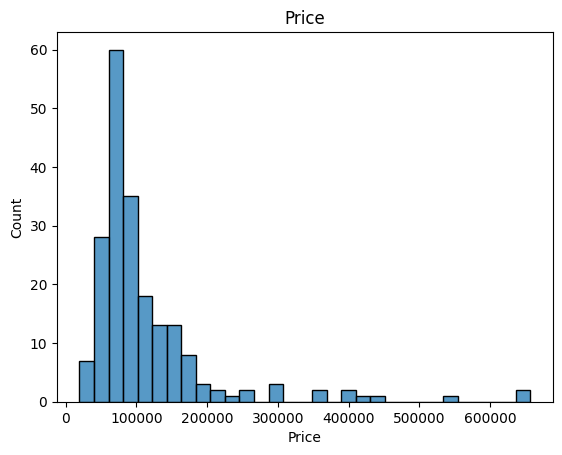

In [53]:
sns.histplot(df.Price)
plt.title('Price')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

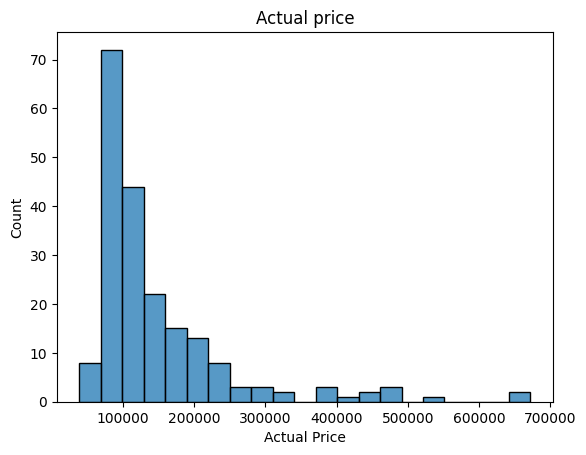

In [54]:
sns.histplot(df['Actual Price'])
plt.title('Actual price')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

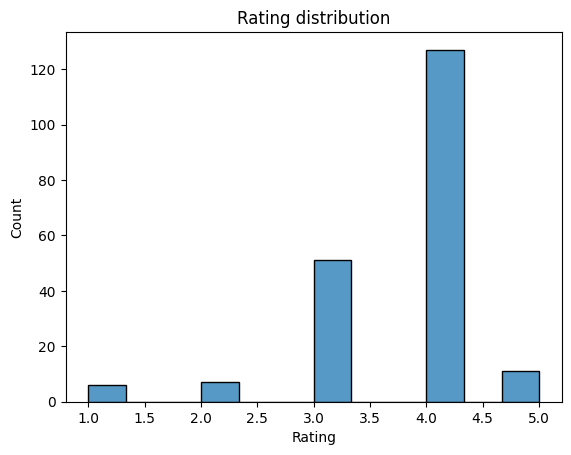

In [55]:
sns.histplot(df.Rating)
plt.title('Rating distribution')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

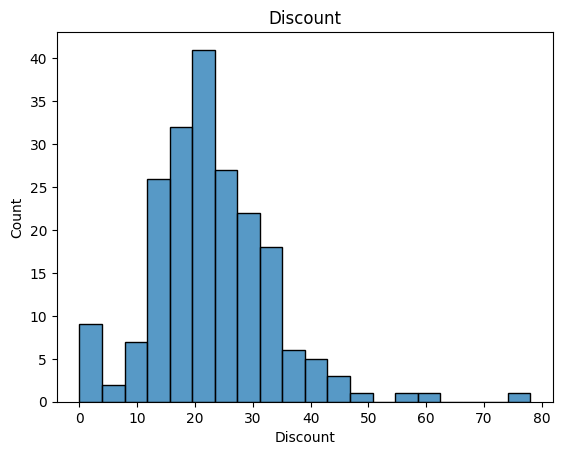

In [56]:
sns.histplot(df.Discount)
plt.title('Discount')
plt.show

In [57]:
#Price and actual price is right skewed most of them are around 1  Lakh
# Most ratings are between 4.0 to 4.5
# Most discounts are between 10% to 35%

In [58]:
#cheapest product
df[df['Price']==df['Price'].min()]

,Name,Price,Actual Price,Discount,Rating,brand,price_category,Graphics
929,(Renewed) Lenovo Thinkpad L450 5th Gen Intel C...,19357,89999,78,3,(RENEWED),cheap,AMD


In [59]:
#cheapest product
df[df['Price']==df['Price'].max()]

,Name,Price,Actual Price,Discount,Rating,brand,price_category,Graphics
247,"MSI Titan GT77 HX, Intel 13th Gen. i9-13980HX,...",657036,671990,2,2,MSI,elite,Nvidia
401,"MSI Titan GT77 HX, Intel 13th Gen. i9-13980HX,...",657036,671990,2,2,MSI,elite,Nvidia


In [60]:
df

,Name,Price,Actual Price,Discount,Rating,brand,price_category,Graphics
0,HP Victus Gaming Laptop AMD Ryzen 5 5600H 15.6...,63113,77354,18,4,HP,cheap,AMD
1,"Lenovo Legion 5 Pro AMD Ryzen 7 6800H 16"" (40....",189100,260290,27,4,LENOVO,elite,Nvidia
7,Acer Aspire 5 Gaming Intel Core i5 12th gen (1...,59999,78999,24,4,ACER,cheap,Nvidia
14,"ASUS TUF Gaming A15, 15.6-inch (39.62 cms) FHD...",59990,71990,17,4,ASUS,cheap,Nvidia
21,"MSI Katana GF76, Intel 11th Gen. i7-11800H, 43...",99990,117990,15,4,MSI,expensive,Nvidia
...,...,...,...,...,...,...,...,...
1007,"MSI Gaming Bravo 15 AMD Ryzen 7-4800H, 40cm FH...",82990,99190,16,4,MSI,average,AMD
1013,"Dell G15 Intel I5-10500H Gaming Laptop, 16Gb D...",69390,79990,13,4,DELL,average,Nvidia
1015,"ASUS ROG Zephyrus M16 (2022), 16-inch (40.64 c...",179990,233990,23,3,ASUS,elite,Nvidia
1023,"ASUS ROG Zephyrus G15, AMD Ryzen 7 6800HS, 15....",157990,189990,17,1,ASUS,expensive,Nvidia


<AxesSubplot: xlabel='Graphics', ylabel='count'>

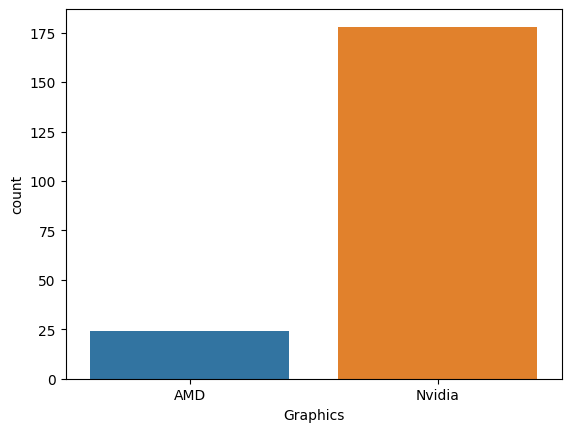

In [61]:
graphic_count= df.groupby('Graphics').size().reset_index(name='count')

sns.barplot(x='Graphics', y='count', data = graphic_count)

In [ ]:
# Most gaming laptops are of nvidia

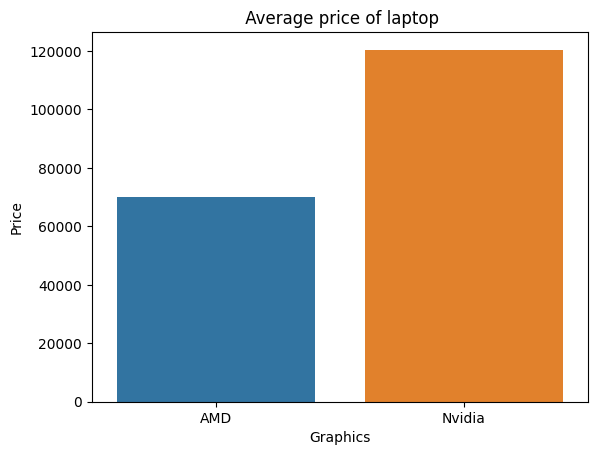

In [62]:
average_price_graphic= df.groupby('Graphics')['Price'].mean().reset_index()

sns.barplot(x='Graphics', y='Price', data = average_price_graphic)
plt.title(' Average price of laptop')
plt.show()

In [ ]:
# AMD laptops are cheap

In [63]:
# Most porducts are AMD

<AxesSubplot: xlabel='Price', ylabel='Actual Price'>

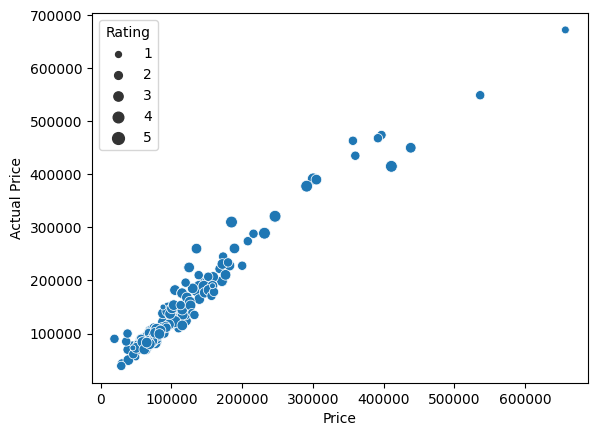

In [64]:
sns.scatterplot(x='Price', y= 'Actual Price', size ='Rating', data =df)

In [65]:
# Brand Analysis

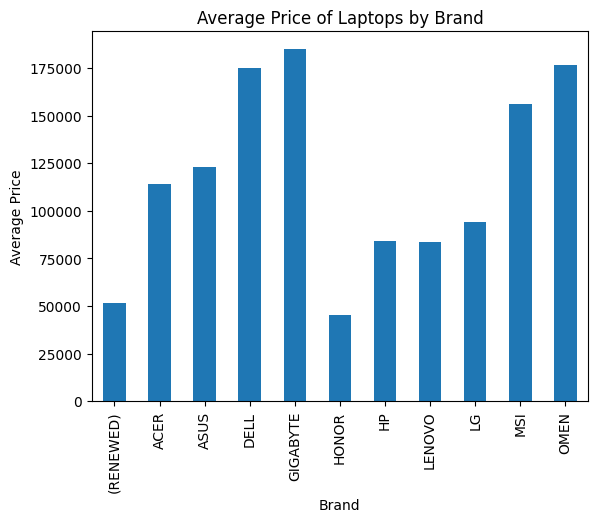

In [66]:

avg_price_by_brand = df.groupby('brand')['Price'].mean()
avg_price_by_brand.plot(kind='bar')
plt.title('Average Price of Laptops by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.show()

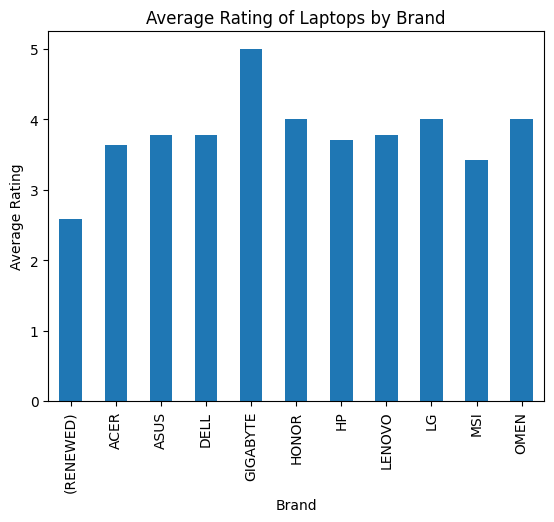

In [67]:

avg_rating_by_brand = df.groupby('brand')['Rating'].mean()
avg_rating_by_brand.plot(kind='bar')
plt.title('Average Rating of Laptops by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.show()

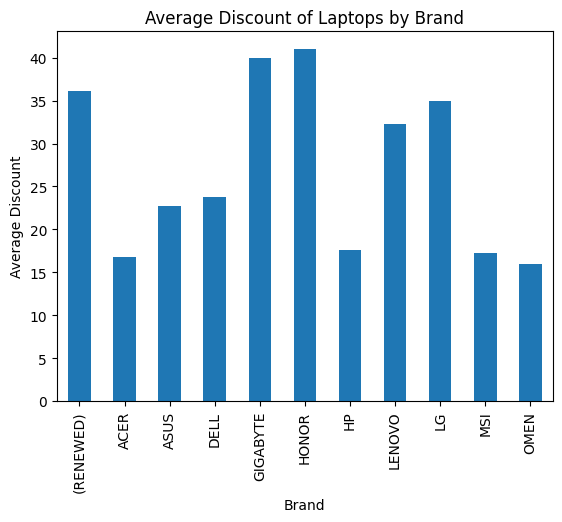

In [68]:

avg_discount_by_brand = df.groupby('brand')['Discount'].mean()
avg_discount_by_brand.plot(kind='bar')
plt.title('Average Discount of Laptops by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Discount')
plt.show()

In [69]:
# Gigabyte has highest average rating,
# Honor, Gigabyte and Renewed products gave discounts above 35%
# GIGABYTE, OMEN, OMEN and MSI gaming laptops are super Expensive
# Lets check the product count of these laptops

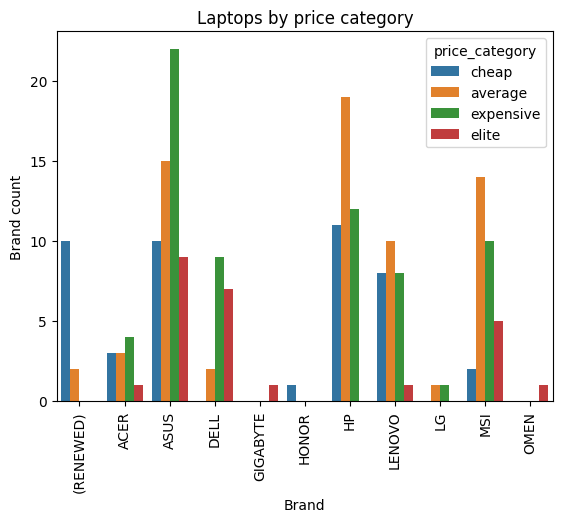

In [70]:
# BRAND distribution
price_category_count = df.groupby(['brand','price_category']).size().rename('Brand count').reset_index()
sns.barplot(x='brand',y='Brand count', hue='price_category', data=price_category_count)
plt.title('Laptops by price category')
plt.xlabel('Brand')
plt.xticks(rotation=90)
plt.show()

In [71]:
# Gigabyte, honoe, omen, LG has only few laptops.

In [72]:
# ASUS sales most laptops with all price category following by HP, Hp's high end laptop is omen which is low in stock, Dell's gaming laptops are not cheap, they known as alienware

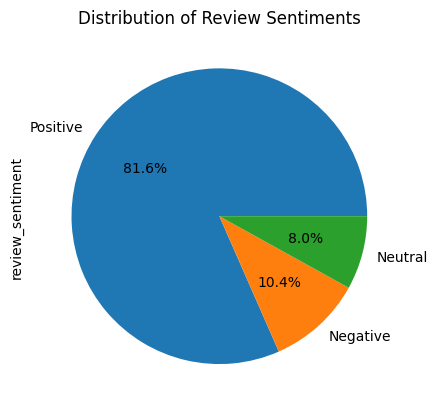

In [73]:
# review sentiment
sentiment_counts = Product_df['review_sentiment'].value_counts()
sentiment_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Review Sentiments')
plt.show()

In [74]:
# Products received 81.3% positive count!

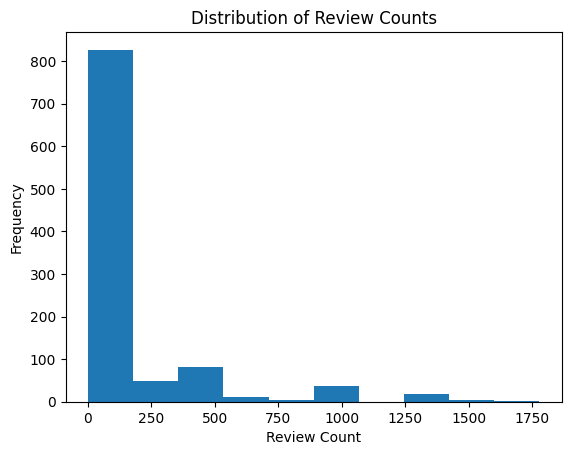

In [75]:
Product_df['Review_count'].plot(kind='hist', bins=10)
plt.title('Distribution of Review Counts')
plt.xlabel('Review Count')
plt.show()

C:\Users\THE_DE_V_IL\AppData\Local\Temp\ipykernel_18460\2482368625.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = Product_df.corr()


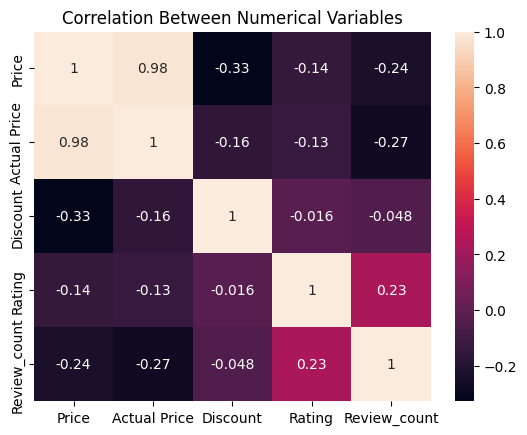

In [76]:
corr = Product_df.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Between Numerical Variables')
plt.show()

In [77]:
Product_df.columns

Index(['Name', 'Price', 'Actual Price', 'Discount', 'Rating', 'review',
       'reviewer', 'review_date', 'review_title', 'Review_count',
       'review_sentiment', 'brand', 'Graphics', 'price_category'],
      dtype='object')

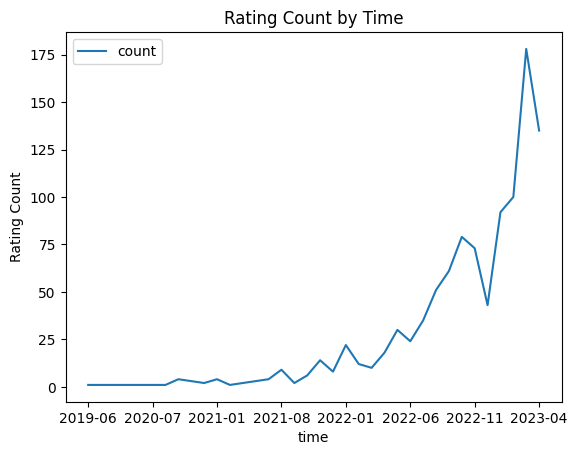

In [78]:

Product_df['review_date'] = pd.to_datetime(Product_df['review_date'])
Product_df['year'] = Product_df['review_date'].dt.year

Product_df['review_date'] = pd.to_datetime(Product_df['review_date'])
Product_df['year_month'] = Product_df['review_date'].dt.strftime('%Y-%m')


rating_count_by_yearmonth = Product_df.groupby('year_month').size().reset_index(name='count')
rating_count_by_year = Product_df.groupby('year').size().reset_index(name='count')

rating_count_by_yearmonth.plot(kind='line', x='year_month', y='count')
plt.title('Rating Count by Time')
plt.xlabel('time')
plt.ylabel('Rating Count')
plt.show()

In [79]:
# Reviews are increasing by month

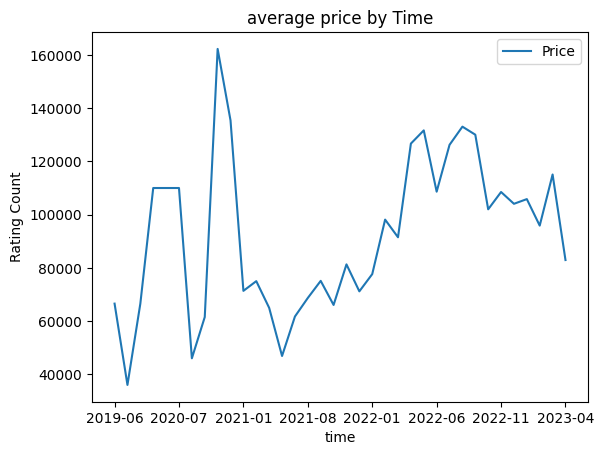

In [80]:
price_by_yearmonth = Product_df.groupby('year_month')['Price'].mean().reset_index()
price_by_yearmonth.plot(kind='line', x='year_month', y='Price')
plt.title('average price by Time')
plt.xlabel('time')
plt.ylabel('Rating Count')
plt.show()


In [81]:
# since asus, hp and msi our most sold gaming laptops, lets check the sentiment count

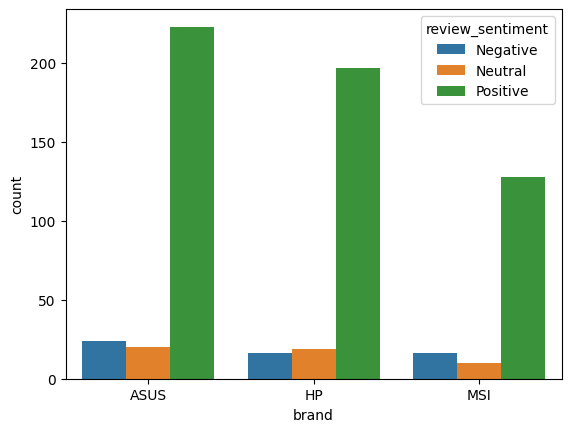

In [82]:

brand = ['MSI', 'ASUS', 'HP']
sentiment_count_top = Product_df[Product_df['brand'].isin(brand)].groupby(['brand', 'review_sentiment']).size().reset_index(name='count')
sns.barplot(x='brand', y='count', hue='review_sentiment', data=sentiment_count_top)
plt.show()

In [83]:
# they all are good brands

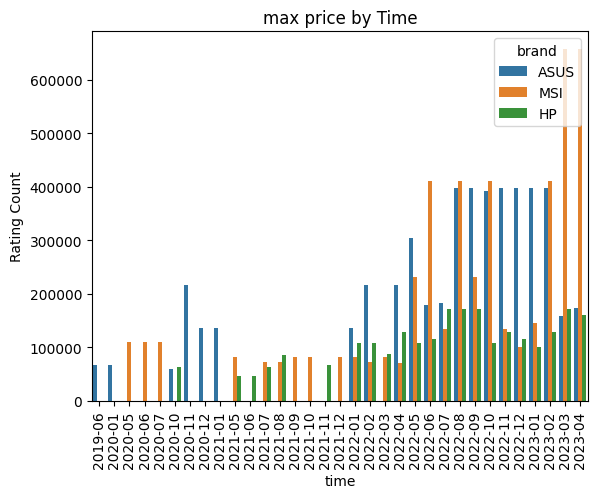

In [84]:
price_over_time = Product_df[Product_df['brand'].isin(brand)].groupby(['year_month','brand'])['Price'].max().reset_index()
sns.barplot(data=price_over_time, x='year_month', y='Price', hue='brand')
plt.title('max price by Time')
plt.xlabel('time')
plt.ylabel('Rating Count')
plt.xticks(rotation= 90)
plt.show()


In [85]:
# Their price are hiking, atleast of their high end product, lets check average price

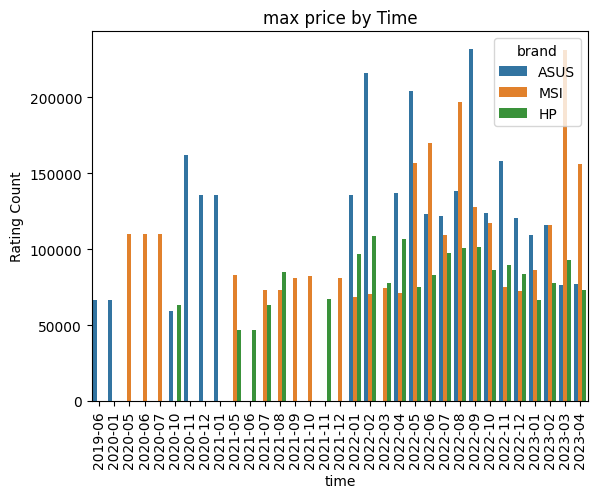

In [86]:
avg_sale_over_time = Product_df[Product_df['brand'].isin(brand)].groupby(['year_month','brand'])['Price'].mean().reset_index()
sns.barplot(data=avg_sale_over_time, x='year_month', y='Price', hue='brand')
plt.title('max price by Time')
plt.xlabel('time')
plt.ylabel('Rating Count')
plt.xticks(rotation= 90)
plt.show()


In [87]:
Product_df.to_csv('Product_df')